<a href="https://colab.research.google.com/github/adodda1/Expected_Goals_Model/blob/main/ExpectedGoalsModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Expected Goals Model
This notebook builds a machine learning model to estimate Expected Goals (xG) in football using historical data.

### Importing Libraries
We import the essential libraries needed for data processing, visualization, and machine learning.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/xg_model.csv')

### 🔍 Data Overview
Display the first few rows of the dataset to understand its structure.

In [ ]:
df.head()

,x,y,is_goal,period,Assisted,Zone,IndividualPlay,RegularPlay,LeftFoot,RightFoot,...,Volley,FastBreak,ThrowinSetPiece,Penalty,OneOnOne,KeyPass,DirectFreekick,OwnGoal,OtherBodyPart,DirectCorner
0,80.8,51.6,False,SecondHalf,True,Center,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79.3,24.2,False,SecondHalf,True,Center,True,True,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,80.0,59.5,False,SecondHalf,True,Center,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,89.8,55.6,False,SecondHalf,True,Center,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,84.9,56.2,False,SecondHalf,True,Center,NaN,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(8118, 25)

In [ ]:
df.x.min()

0.8

In [ ]:
df.y.min()

3.1

In [ ]:
df.columns

Index(['x', 'y', 'is_goal', 'period', 'Assisted', 'Zone', 'IndividualPlay',
       'RegularPlay', 'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch',
       'Head', 'BigChance', 'SetPiece', 'Volley', 'FastBreak',
       'ThrowinSetPiece', 'Penalty', 'OneOnOne', 'KeyPass', 'DirectFreekick',
       'OwnGoal', 'OtherBodyPart', 'DirectCorner'],
      dtype='object')

In [ ]:
df.drop(['DirectFreekick','DirectCorner'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['x', 'y', 'is_goal', 'period', 'Assisted', 'Zone', 'IndividualPlay',
       'RegularPlay', 'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch',
       'Head', 'BigChance', 'SetPiece', 'Volley', 'FastBreak',
       'ThrowinSetPiece', 'Penalty', 'OneOnOne', 'KeyPass', 'OwnGoal',
       'OtherBodyPart'],
      dtype='object')

In [ ]:
df['OwnGoal'].value_counts()

,count
OwnGoal,
True,27


In [ ]:
df = df[df['OwnGoal']!=True]

In [ ]:
df.drop(['OwnGoal'], axis=1, inplace=True)

In [ ]:
df.shape

(8091, 22)

In [ ]:
df.is_goal.value_counts()

,count
is_goal,
False,7097
True,994


### Visualizing Shot Locations
We plot the shot locations to get a sense of where most shots are taken from.

<Axes: xlabel='x', ylabel='y'>

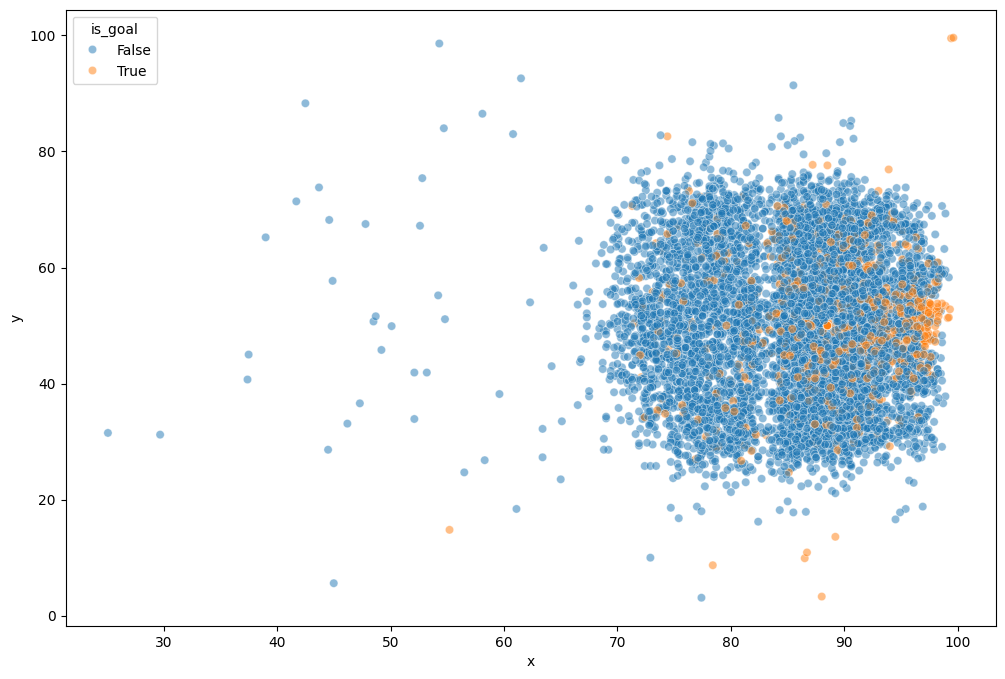

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12,8))

sns.scatterplot(x='x', y='y', hue='is_goal', data=df, alpha = 0.5)

In [ ]:
df.isnull().sum()

,0
x,0
y,0
is_goal,0
period,0
Assisted,2053
Zone,0
IndividualPlay,5289
RegularPlay,2714
LeftFoot,5307
RightFoot,4106


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.dtypes

,0
x,float64
y,float64
is_goal,bool
period,object
Assisted,object
Zone,object
IndividualPlay,object
RegularPlay,object
LeftFoot,object
RightFoot,object


### Feature Engineering
Create relevant features such as distance from goal and angle to goal.

In [ ]:
df = df.astype({
    'x':float,
    'y':float,
    'is_goal':bool,
    'period':str,
    'Assisted':bool,
    'Zone':str,
    'IndividualPlay':bool,
    'RegularPlay':bool,
    'LeftFoot':bool,
    'RightFoot':bool,
    'FromCorner':bool,
    'FirstTouch':bool,
    'Head':bool,
    'BigChance':bool,
    'SetPiece':bool,
    'Volley':bool,
    'FastBreak':bool,
    'ThrowinSetPiece':bool,
    'Penalty':bool,
    'OneOnOne':bool,
    'KeyPass':bool,
    'OtherBodyPart':bool
})

In [ ]:
df.dtypes

,0
x,float64
y,float64
is_goal,bool
period,object
Assisted,bool
Zone,object
IndividualPlay,bool
RegularPlay,bool
LeftFoot,bool
RightFoot,bool


In [ ]:
df['ShotDistance'] = np.sqrt((df['x']-100)**2 + (df['y']-50)**2)

In [ ]:
df.ShotDistance

,ShotDistance
0,19.266551
1,33.077636
2,22.141590
3,11.636151
4,16.323296
...,...
8113,20.999048
8114,7.665507
8115,16.697305
8116,10.572133


<Axes: >

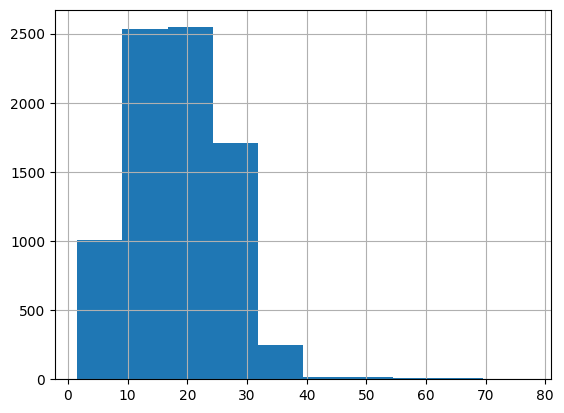

In [ ]:
df['ShotDistance'].hist()

In [ ]:
df['ShotDistance'].describe()

,ShotDistance
count,8091.000000
mean,18.495064
std,8.011289
min,1.581139
25%,12.061300
50%,18.380696
75%,24.200207
max,77.150891


In [ ]:
df.period.value_counts()

,count
period,
SecondHalf,4333
FirstHalf,3758


In [ ]:
df = pd.get_dummies(df, columns=['period','Zone'])

In [ ]:
df.columns

Index(['x', 'y', 'is_goal', 'Assisted', 'IndividualPlay', 'RegularPlay',
       'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch', 'Head',
       'BigChance', 'SetPiece', 'Volley', 'FastBreak', 'ThrowinSetPiece',
       'Penalty', 'OneOnOne', 'KeyPass', 'OtherBodyPart', 'ShotDistance',
       'period_FirstHalf', 'period_SecondHalf', 'Zone_Back', 'Zone_Center',
       'Zone_Left', 'Zone_Right'],
      dtype='object')

In [ ]:
X = df.drop(['is_goal'], axis=1)
y = df['is_goal']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, brier_score_loss

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ⚙️ Hyperparameter Tuning with GridSearchCV
Use GridSearchCV to find the best logistic regression parameters.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])

param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10],
    'log_reg__penalty': ['l1', 'l2'],
    'log_reg__max_iter': [100, 200, 500]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **l

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'log_reg__C': [0.01, 0.1, 1, 10],
                         'log_reg__max_iter': [100, 200, 500],
                         'log_reg__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'log_reg__C': 0.1, 'log_reg__max_iter': 100, 'log_reg__penalty': 'l2'}

### Final Model Training
Train the model again using the best parameters from grid search.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    C=0.1,
    max_iter=100,
    penalty='l2',
    solver='lbfgs'
)


log_reg.fit(X_train, y_train)


y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred_proba

array([0.07225318, 0.3469924 , 0.04197806, ..., 0.03397224, 0.08462336,
       0.36080454])

In [ ]:
final_df = X_test.copy()
final_df['goal probability'] = y_pred_proba

In [ ]:
final_df.iloc[830]

,1808
x,79.1
y,70.3
Assisted,False
IndividualPlay,False
RegularPlay,False
LeftFoot,True
RightFoot,False
FromCorner,False
FirstTouch,False
Head,False


In [ ]:
final_df.shape

(1619, 27)

In [ ]:
final_df[['goal probability','Penalty']].sort_values(by='goal probability', ascending=False).head()

,goal probability,Penalty
3671,0.744717,True
1323,0.744717,True
6619,0.744717,True
381,0.744717,True
473,0.737809,True


### Model Evaluation
Evaluate the trained model using accuracy, confusion matrix, and ROC curve.

In [ ]:
log_loss(y_test, y_pred_proba)

0.27270070104224897

In [ ]:
roc_auc_score(y_test, y_pred_proba)

np.float64(0.8071314952279958)

In [ ]:
brier_score_loss(y_test, y_pred_proba)

np.float64(0.07757148063984375)

### Visualization of Probabilities
Plotting the shots on a soccer pitch with respective probabilities.

In [ ]:
!pip install mplsoccer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 2.1 MB/s eta 0:00:00


In [ ]:
from mplsoccer import Pitch
pitch = Pitch(pitch_type='opta')

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ['red','yellow','green']

cmap = LinearSegmentedColormap.from_list("my_colormap", colors)

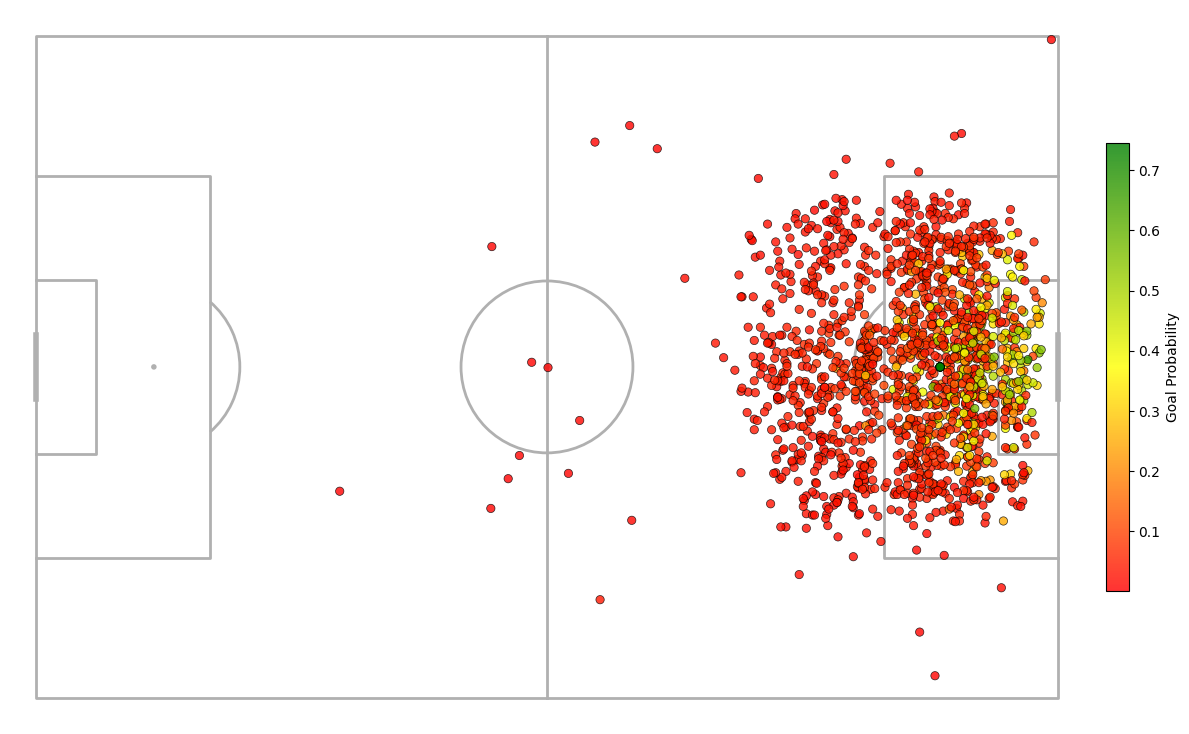

In [ ]:
from typing_extensions import final
fig, ax = pitch.draw(figsize=(12,8))

sc = pitch.scatter(
    final_df['x'],
    final_df['y'],
    c=final_df['goal probability'],
    cmap=cmap,
    linewidth=0.5,
    edgecolor='black',
    alpha=0.8,
    ax=ax
)

cbar=plt.colorbar(sc, ax=ax,orientation='vertical', label='Goal Probability',fraction=0.02,pad=0.02)